<a href="https://colab.research.google.com/github/malav-radia/SMSSpam/blob/main/SMSSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

encodings=['utf-8','latin1','ISO-8859-1','cp1252',"ascii"]
#encodings to try

for encoding in encodings:
  try:
    dataset=pd.read_csv("/content/drive/MyDrive/spam.csv", encoding=encoding)
    print("Successful with", encoding)
    break #If we get any encoding right we stop
  except UnicodeDecodeError:
    print("Failed with:",encoding)
    continue #Go for the next possible encoding

Failed with: utf-8
Successful with latin1


In [ ]:
dataset.shape
#To know what is the column num and row num

(5572, 5)

In [ ]:
dataset.sample(10)
#taking a sample from population to get basic idea of rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2737,ham,Hi Chachi tried calling u now unable to reach ...,NaN,NaN,NaN
2358,ham,I'll talk to the others and probably just come...,NaN,NaN,NaN
3586,ham,Our ride equally uneventful - not too many of ...,NaN,NaN,NaN
2655,ham,Great! I have to run now so ttyl!,NaN,NaN,NaN
2484,ham,Only if you promise your getting out as SOON a...,NaN,NaN,NaN
4122,ham,"Cool, want me to go to kappa or should I meet ...",NaN,NaN,NaN
1474,ham,"Friendship is not a game to play, It is not a ...",NaN,NaN,NaN
1062,ham,Ok. Not sure what time tho as not sure if can ...,NaN,NaN,NaN
622,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...,NaN,NaN,NaN
2906,ham,ALRITE,NaN,NaN,NaN


# 1. Data Cleaning

In [ ]:
dataset.info()
#To see the basic info of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:

dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
#No need of these columns so removing
dataset.sample(5)

,v1,v2
2088,spam,Well done ENGLAND! Get the official poly ringt...
4976,ham,A boy was late 2 home. His father: \POWER OF F...
2681,ham,I'm on da bus going home...
4348,ham,ÌÏ bot notes oredi... Cos i juz rem i got...
1822,ham,If you're thinking of lifting me one then no.


In [ ]:
#renaming columns to understand better
dataset.rename(columns={'v1':'class','v2':'text'},inplace=True)
dataset.sample(5)

,class,text
1015,ham,"Dear,regret i cudnt pick call.drove down frm c..."
1254,ham,What your plan for pongal?
96,ham,Watching telugu movie..wat abt u?
2213,ham,"Goodmorning, today i am late for 2hrs. Because..."
1505,ham,Total video converter free download type this ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["class"]=encoder.fit_transform(dataset["class"])
dataset.sample(5)
#Changing labels in class column(spam as 1 and ham as 0)

,class,text
3178,0,Does cinema plus drink appeal tomo? * Is a fr ...
4731,0,Wat time r Ì_ going to xin's hostel?
5254,0,I didnt get anything da
5339,0,You'd like that wouldn't you? Jerk!
1584,0,"Sorry, I'll call later"


In [ ]:
dataset.isnull().sum()
#no null values

class    0
text     0
dtype: int64

In [ ]:
dataset.duplicated().sum()
#We got some duplicated values

403

In [ ]:
dataset=dataset.drop_duplicates(keep='first')
#removed
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(5169, 2)

# Exploratory Data Analysis

In [ ]:
dataset['class'].value_counts()

class
0    4516
1     653
Name: count, dtype: int64

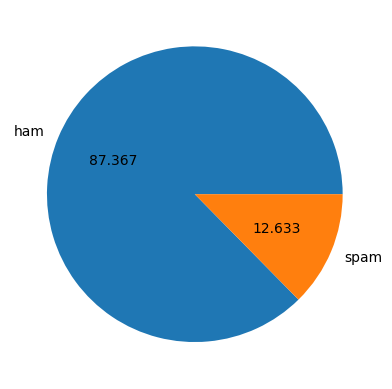

In [ ]:
import matplotlib.pyplot as plt
plt.pie(dataset['class'].value_counts(),labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install nltk

In [ ]:
dataset["num_characters"]=dataset["text"].apply(len)
dataset.head(5)

,class,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
dataset["num_words"]=dataset["text"].apply(lambda x:len(nltk.word_tokenize(x)))
dataset.sample(5)

,class,text,num_characters,num_words
2073,1,FreeMsg: Claim ur 250 SMS messages-Text OK to ...,161,37
4375,1,"If you don't, your prize will go to another cu...",144,32
4707,0,"Did you say bold, then torch later. Or one tor...",59,15
273,0,"Usf I guess, might as well take 1 car",37,10
1747,0,I think u have the wrong number.,32,8


In [ ]:
dataset["num_sentences"]=dataset["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset.sample(5)

,class,text,num_characters,num_words,num_sentences
1508,0,Sounds like something that someone testing me ...,56,9,1
3354,0,Minimum walk is 3miles a day.,29,7,1
2104,0,Anyway seriously hit me up when you're back be...,134,26,1
428,0,7 at esplanade.. Do Ì_ mind giving me a lift c...,69,18,1
3672,0,Moji just informed me that you saved our lives...,55,12,2


In [ ]:
dataset[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
dataset[dataset["class"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
dataset[dataset["class"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

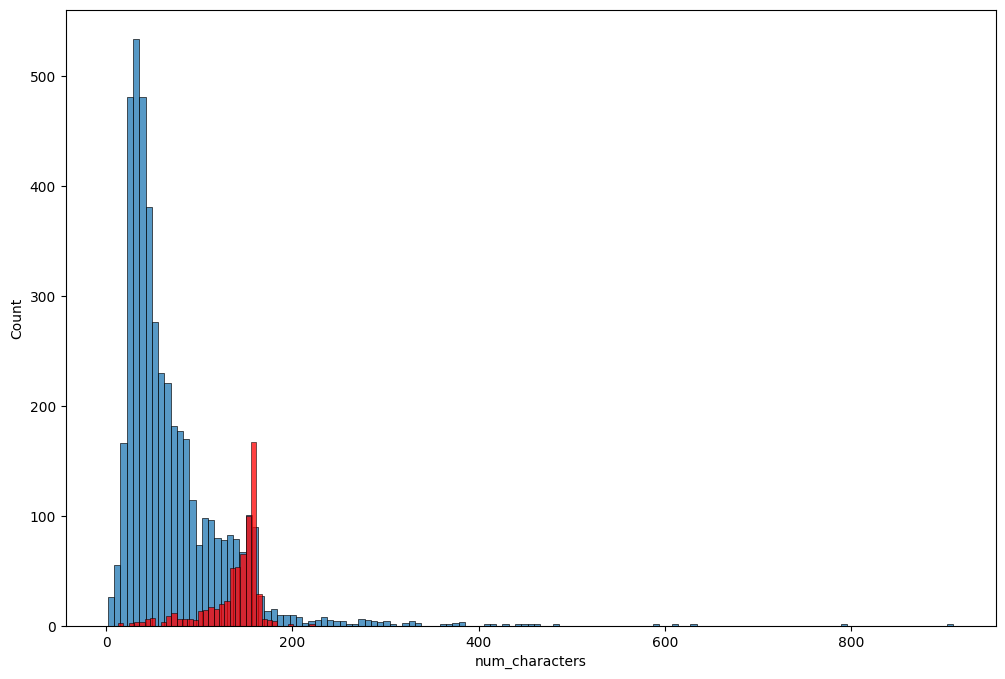

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset["class"]==0]["num_characters"])
sns.histplot(dataset[dataset["class"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

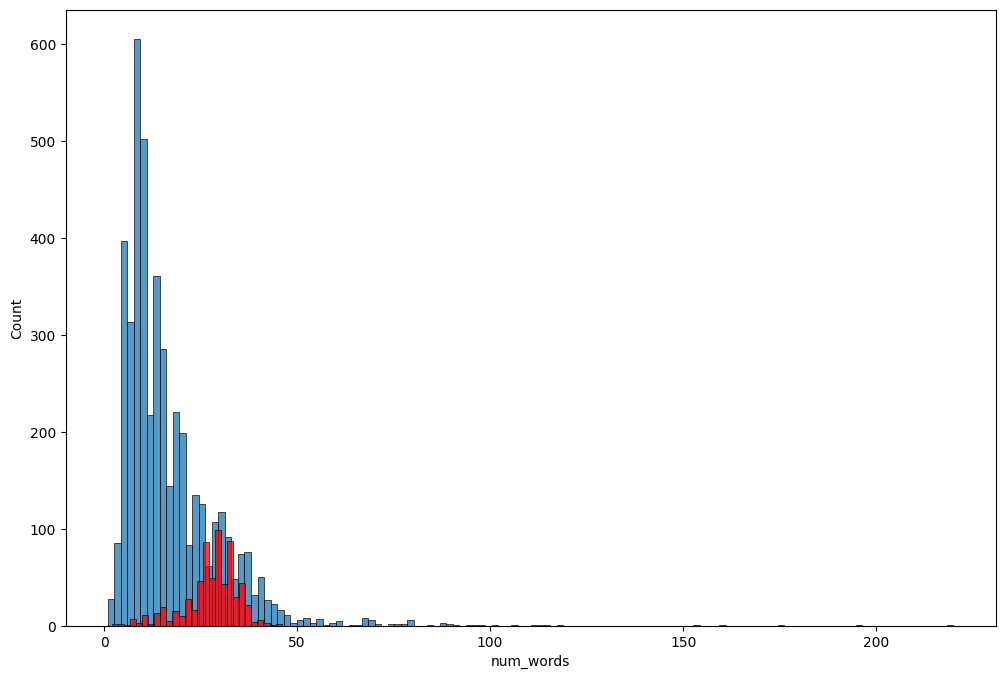

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset["class"]==0]["num_words"])
sns.histplot(dataset[dataset["class"]==1]["num_words"],color="red")

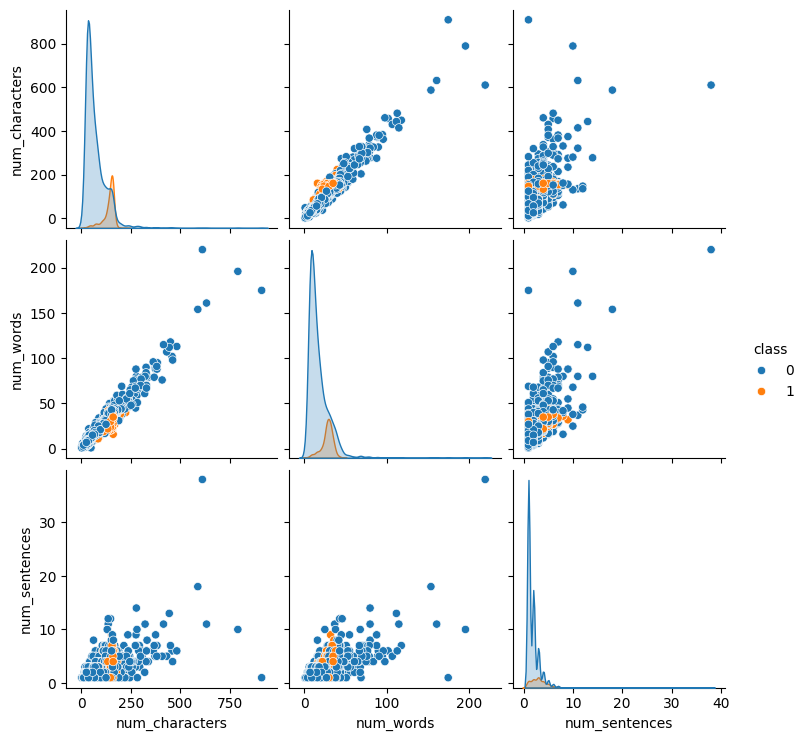

In [ ]:
sns.pairplot(dataset,hue="class")

<Axes: >

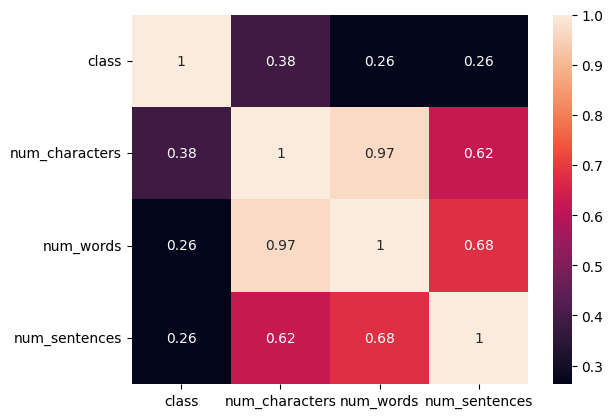

In [ ]:
import seaborn as sns
sns.heatmap(dataset[["class","num_characters","num_words","num_sentences"]].corr(), annot=True)

# Data Preprocessing

1 Lower case
2 Tokenize(sentences to words)
3 Removing special char
4 Removing stop words and punctuation
5 Stemming

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
dataset['transformed_text']=dataset['text'].apply(transform_text)
dataset.head()

,class,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah thi...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(dataset[dataset["class"]==1]["transformed_text"].str.cat(sep=" "))

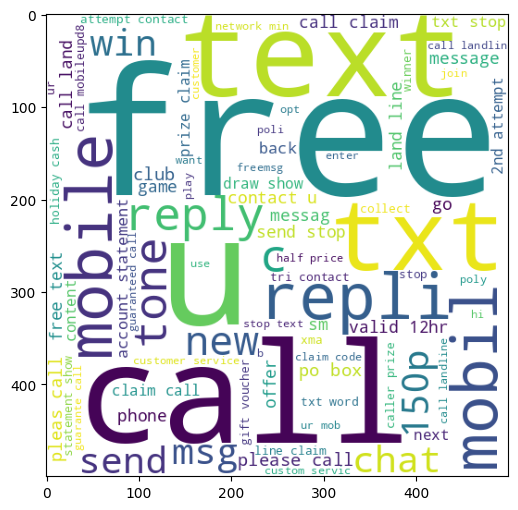

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

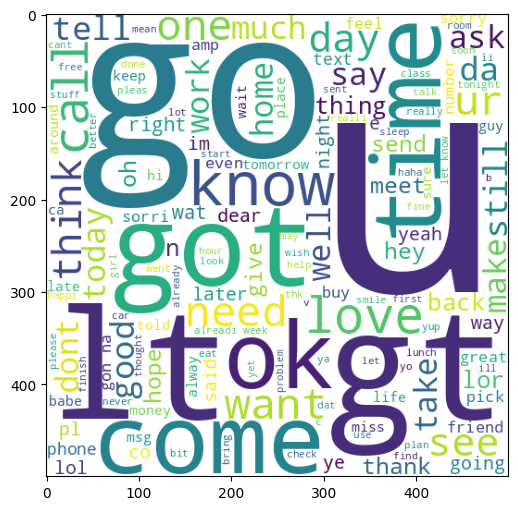

In [ ]:
ham_wc=wc.generate(dataset[dataset["class"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in dataset[dataset["class"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

19878

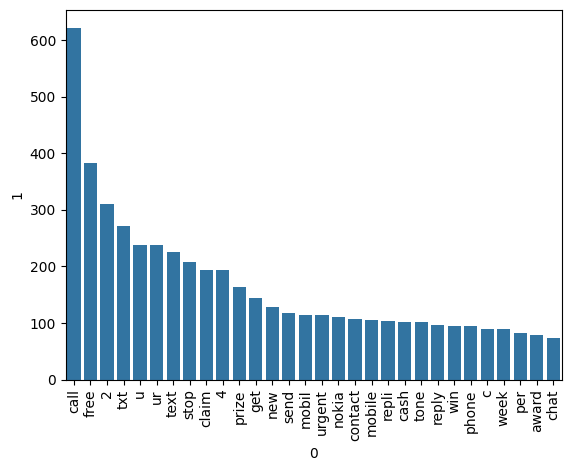

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
ham_corpus=[]
for msg in dataset[dataset["class"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

70808

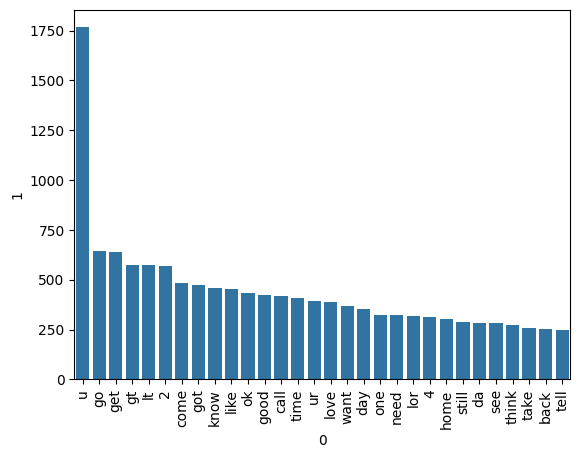

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# Building the Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=tfidf.fit_transform(dataset["transformed_text"]).toarray()

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y=dataset["class"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[787 109]
 [ 21 117]]
0.5176991150442478


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [ ]:
#so tfid and mnb

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

  current_accuracy,current_precision=train_classifier(clf, x_train,y_train,x_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KNC
Accuracy -  0.9061895551257253
Precision -  1.0
For  MNB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9595959595959596
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9565217391304348
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8951612903225806
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9468085106382979
For  XGB
Accuracy -  0.9680851063829787
Precision -  0.9565217391304348


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KNC,0.906190,1.000000
2,MNB,0.974855,1.000000
5,RF,0.975822,0.982906
0,SVC,0.974855,0.974576
8,ETC,0.977756,0.967480
4,LR,0.954545,0.959596
6,AdaBoost,0.968085,0.956522
10,XGB,0.968085,0.956522
9,GBDT,0.947776,0.946809
7,BgC,0.961315,0.895161


In [ ]:
performance_df1=pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1


,Algorithm,variable,value
0,KNC,Accuracy,0.906190
1,MNB,Accuracy,0.974855
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.974855
4,ETC,Accuracy,0.977756
5,LR,Accuracy,0.954545
6,AdaBoost,Accuracy,0.968085
7,XGB,Accuracy,0.968085
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.961315


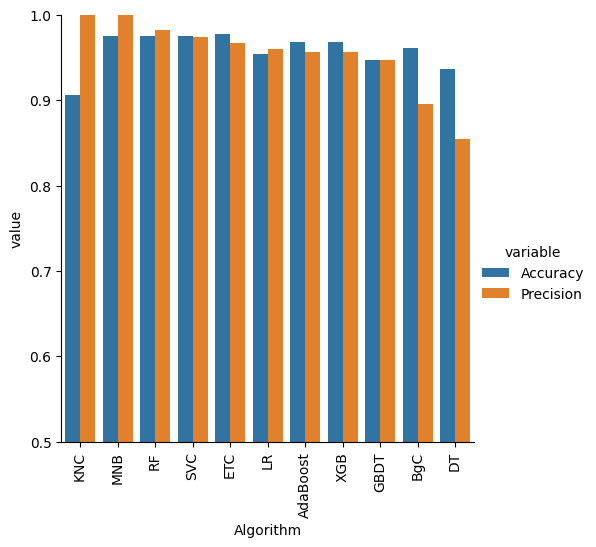

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled=new_df.rename(columns={'Accuracy':'Accuracy_scaling','Precision':'Precision_scaling'})

In [ ]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy_scaling_x,Precision_scaling_x,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling_y,Precision_scaling_y
0,KNC,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,MNB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
5,LR,0.954545,0.959596,0.954545,0.959596,0.954545,0.959596
6,AdaBoost,0.968085,0.956522,0.968085,0.956522,0.968085,0.956522
7,XGB,0.968085,0.956522,0.968085,0.956522,0.968085,0.956522
8,GBDT,0.947776,0.946809,0.947776,0.946809,0.947776,0.946809
9,BgC,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161


In [ ]:
#voting classifier
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred=voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [ ]:
import pickle
pickle.dump(tfidf,open('/content/vectorizer.pkl','wb'))
pickle.dump(mnb,open('/content/model.pkl','wb'))